# 🎨 Paint: Herbie's Custom Colormaps

> ### 🚧 Work in progress

Herbie comes with it's own paint, or custom colormaps for various types of maps. I don't promise they are all "color blind friendly" aor perceptively uniform, but they look nice to me.

This includes:

- National Weather Service custom color curves.
- Brian's custom terrain cmaps.


In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc
import herbie.paint as paint
import numpy as np


import matplotlib.pyplot as plt

## NWS Standard Color Curves
Colormaps are registered with matplotlib.

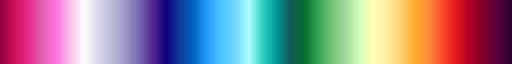

In [2]:
plt.get_cmap("nws.tmp")

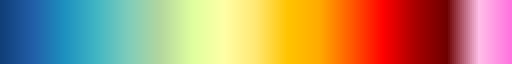

In [4]:
plt.get_cmap("nws.wind")

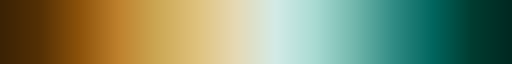

In [5]:
plt.get_cmap("nws.dpt")

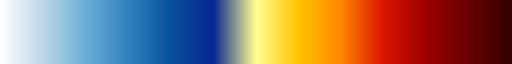

In [6]:
plt.get_cmap("nws.snow")

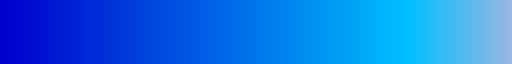

In [7]:
plt.get_cmap("water")

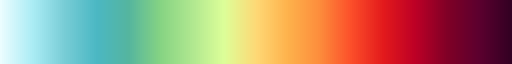

In [8]:
plt.get_cmap("nws.wave")

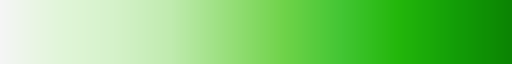

In [9]:
plt.get_cmap("nws.rain_pop")

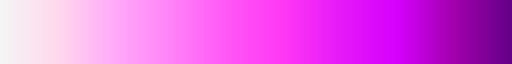

In [10]:
plt.get_cmap("nws.ice_pop")

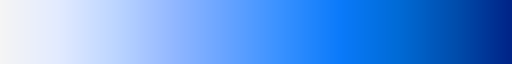

In [11]:
plt.get_cmap("nws.snow_pop")

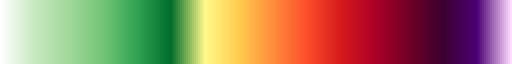

In [12]:
plt.get_cmap("nws.pcp")

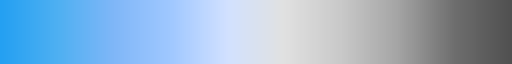

In [13]:
plt.get_cmap("nws.cloud")

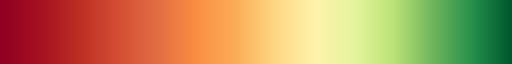

In [14]:
plt.get_cmap("nws.rh")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


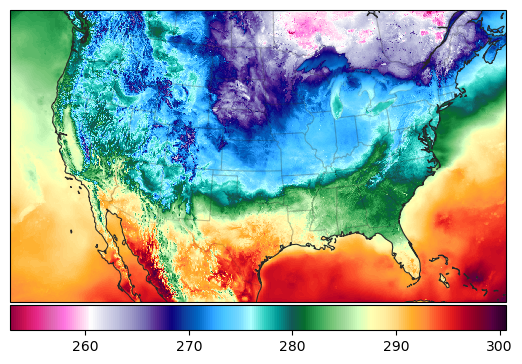

In [15]:
H = Herbie("2024-01-01")
ds = H.xarray("TMP:2 m")

ax = EasyMap("50m", crs=ds.herbie.crs).STATES().ax
art = ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m, cmap="nws.tmp", transform=pc)

plt.colorbar(art, ax=ax, orientation="horizontal", pad=0.01)

## Terrain Colormaps

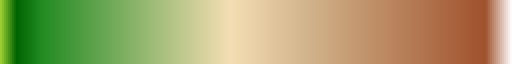

In [16]:
plt.get_cmap("land_green")

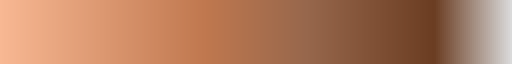

In [17]:
plt.get_cmap("land_tan")

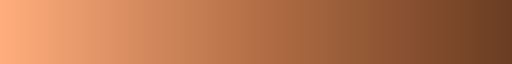

In [18]:
plt.get_cmap("land_brown")

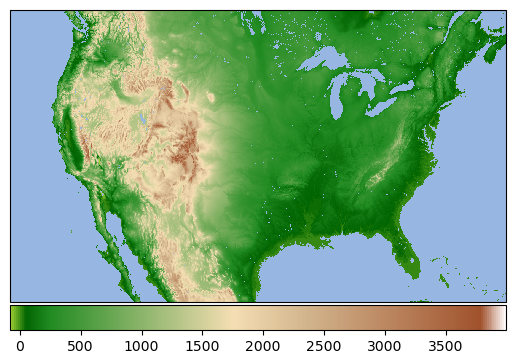

In [19]:
t = H.terrain()
ax = EasyMap(crs=t.herbie.crs, add_coastlines=False).ax
art = ax.pcolormesh(t.longitude, t.latitude, t.orog, cmap="land_green", transform=pc)

plt.colorbar(art, ax=ax, orientation="horizontal", pad=0.01)

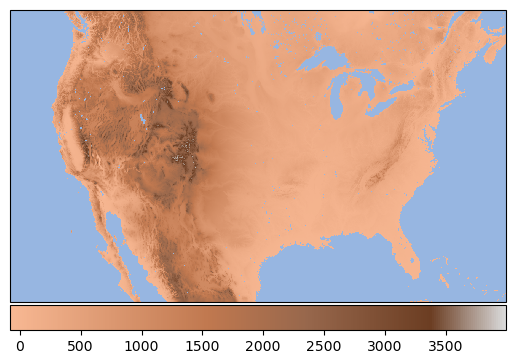

In [20]:
ax = EasyMap(crs=t.herbie.crs, add_coastlines=False).ax
art = ax.pcolormesh(t.longitude, t.latitude, t.orog, cmap="land_tan", transform=pc)

plt.colorbar(art, ax=ax, orientation="horizontal", pad=0.01)

## Paint with intended bounds
All bounds are ing SI units
- Temperature = Celsius
- Precipitation = mm
- dew point == Celsius
- etc.

In [21]:
np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 65, 70, 75, 80])

array([ 0, 10, 20, 30, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [24]:
(np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 65, 70, 75, 80]) - 30) / 2

array([-15. , -10. ,  -5. ,   0. ,   5. ,   7.5,  10. ,  12.5,  15. ,
        17.5,  20. ,  22.5,  25. ])

In [2]:
ds = Herbie("2024-01-01").xarray("TMP:2 m")
ds2 = Herbie("2024-01-01").xarray("GRD:500 mb")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


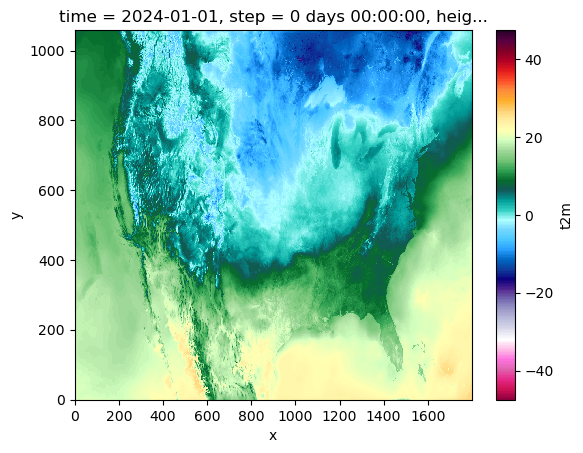

In [3]:
(ds.t2m - 273.15).plot(**paint.NWSTemperature.kwargs)

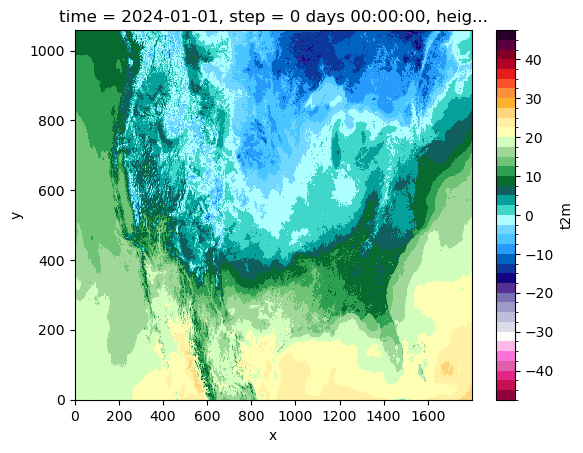

In [4]:
(ds.t2m - 273.15).plot(**paint.NWSTemperature.kwargs2)

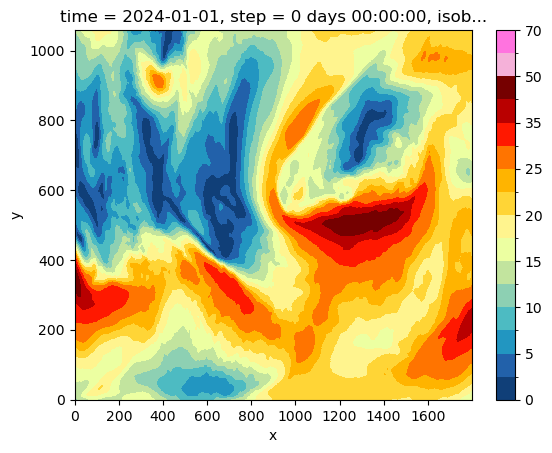

In [19]:
(np.sqrt(ds2.u**2 + ds2.v**2)).plot(**paint.NWSWindSpeed.kwargs2)

In [38]:
(np.linspace(-65, 125, len(paint.NWSTemperature.colors) + 1) - 30) / 2

array([-47.5, -45. , -42.5, -40. , -37.5, -35. , -32.5, -30. , -27.5,
       -25. , -22.5, -20. , -17.5, -15. , -12.5, -10. ,  -7.5,  -5. ,
        -2.5,   0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,
        20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,
        42.5,  45. ,  47.5])

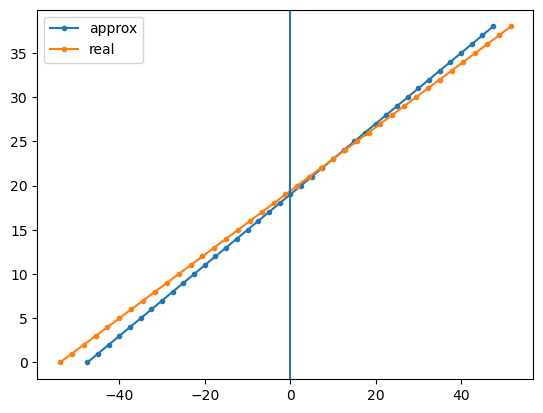

In [48]:
plt.plot(
    (np.linspace(-65, 125, len(paint.NWSTemperature.colors) + 1) - 30) / 2,
    range(39),
    marker=".",
    label="approx",
)

plt.plot(
    (np.linspace(-65, 125, len(paint.NWSTemperature.colors) + 1) - 32) * 5 / 9,
    range(39),
    marker=".",
    label="real",
)

plt.axvline(0)
plt.legend()

In [36]:
np.linspace(-65, 125, len(paint.NWSTemperature.colors) + 1)

array([-65., -60., -55., -50., -45., -40., -35., -30., -25., -20., -15.,
       -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,
        45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95.,
       100., 105., 110., 115., 120., 125.])

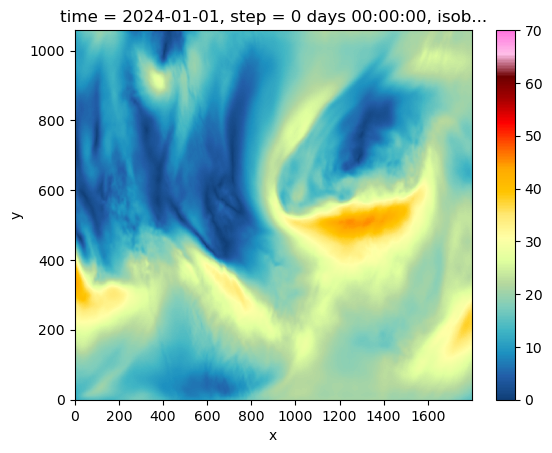

In [16]:
(np.sqrt(ds2.u**2 + ds2.v**2)).plot(**paint.NWSWindSpeed.kwargs)

In [40]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def make_custom_cmaps(colors, name, bounds):
    linear_cmap = mcolors.LinearSegmentedColormap.from_list(name, colors)
    segment_cmap = mcolors.LinearSegmentedColormap.from_list(
        name + "2", colors, N=len(colors)
    )

    for cm in [linear_cmap, segment_cmap]:
        mpl.colormaps.register(cmap=cm, force=True)
        mpl.colormaps.register(cmap=cm.reversed(), force=True)

    return (
        mcolors.Normalize(bounds.min(), bounds.max()),
        mcolors.BoundaryNorm(bounds, linear_cmap.N),
    )


class NWSTemperature:
    name = "nws.tmp"
    colors = np.array(
        [
            "#91003f",
            "#ce1256",
            "#e7298a",
            "#df65b0",
            "#ff73df",
            "#ffbee8",
            "#ffffff",
            "#dadaeb",
            "#bcbddc",
            "#9e9ac8",
            "#756bb1",
            "#54278f",
            "#0d007d",
            "#0d3d9c",
            "#0066c2",
            "#299eff",
            "#4ac7ff",
            "#73d7ff",
            "#adffff",
            "#30cfc2",
            "#009996",
            "#125757",
            "#066d2c",
            "#31a354",
            "#74c476",
            "#a1d99b",
            "#d3ffbe",
            "#ffffb3",
            "#ffeda0",
            "#fed176",
            "#feae2a",
            "#fd8d3c",
            "#fc4e2a",
            "#e31a1c",
            "#b10026",
            "#800026",
            "#590042",
            "#280028",
        ]
    )
    vmin = -50
    vmax = 50
    bounds = np.linspace(vmin, vmax, len(colors))
    norm, norm2 = make_custom_cmaps(colors, name, bounds)
    cmap = plt.get_cmap(name)
    cmap2 = plt.get_cmap(name + "2")
    kwargs = dict(cmap=cmap, norm=mcolors.Normalize(vmin, vmax))
    kwargs2 = dict(cmap=cmap, norm=norm2)

/tmp/ipykernel_2364/3580878999.py:14: UserWarning: Overwriting the cmap 'nws_tmp' that was already in the registry.
  mpl.colormaps.register(cmap=cm, force=True)
/tmp/ipykernel_2364/3580878999.py:15: UserWarning: Overwriting the cmap 'nws_tmp_r' that was already in the registry.
  mpl.colormaps.register(cmap=cm.reversed(), force=True)
/tmp/ipykernel_2364/3580878999.py:14: UserWarning: Overwriting the cmap 'nws_tmp2' that was already in the registry.
  mpl.colormaps.register(cmap=cm, force=True)
/tmp/ipykernel_2364/3580878999.py:15: UserWarning: Overwriting the cmap 'nws_tmp2_r' that was already in the registry.
  mpl.colormaps.register(cmap=cm.reversed(), force=True)


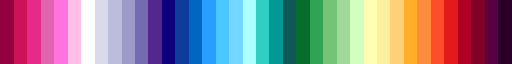

In [41]:
NWSTemperature.cmap2

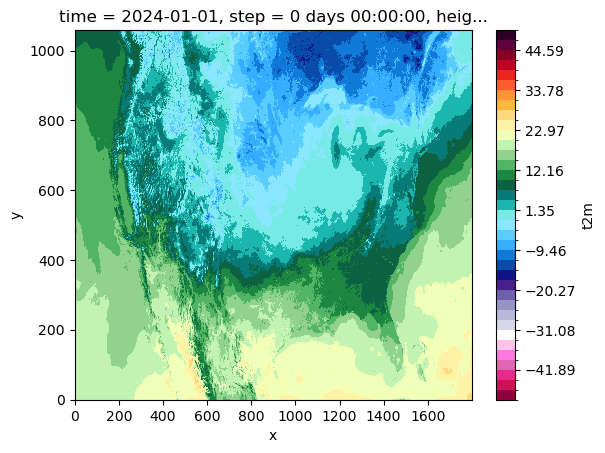

In [39]:
(ds.t2m - 273.15).plot(**NWSTemperature.kwargs2)

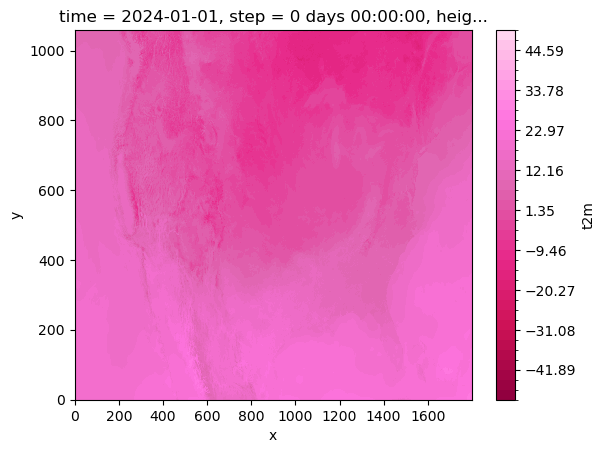

In [24]:
(ds.t2m - 273.15).plot(**NWSTemperature.kwargs2)

In [13]:
colors = np.array(
    [
        "#24a0f2",
        "#4eb0f2",
        "#80b7f8",
        "#a0c8ff",
        "#d2e1ff",
        "#e1e1e1",
        "#c9c9c9",
        "#a5a5a5",
        "#6e6e6e",
        "#505050",
    ]
)
np.linspace(0, 100, len(colors) + 1)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

## Lightness

https://matplotlib.org/stable/users/explain/colors/colormaps.html

dict_items([('herbie.paint', ['nws_tmp', 'nws_dpt', 'nws_rh', 'nws_wind', 'nws_cloud', 'nws_pcp', 'nws_snow', 'nws_snow_pop', 'nws_ice_pop', 'nws_rain_pop', 'nws_wave', 'land_tan', 'land_brown', 'land_green'])])
herbie.paint


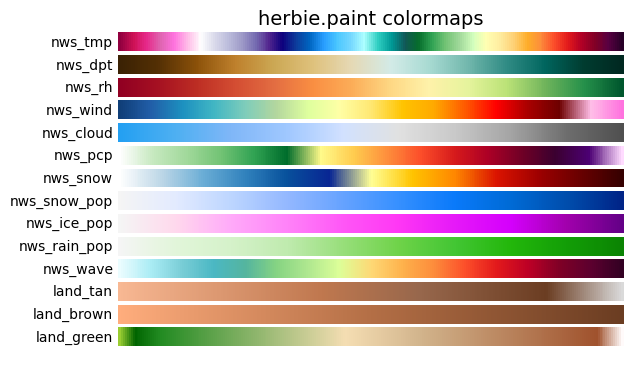

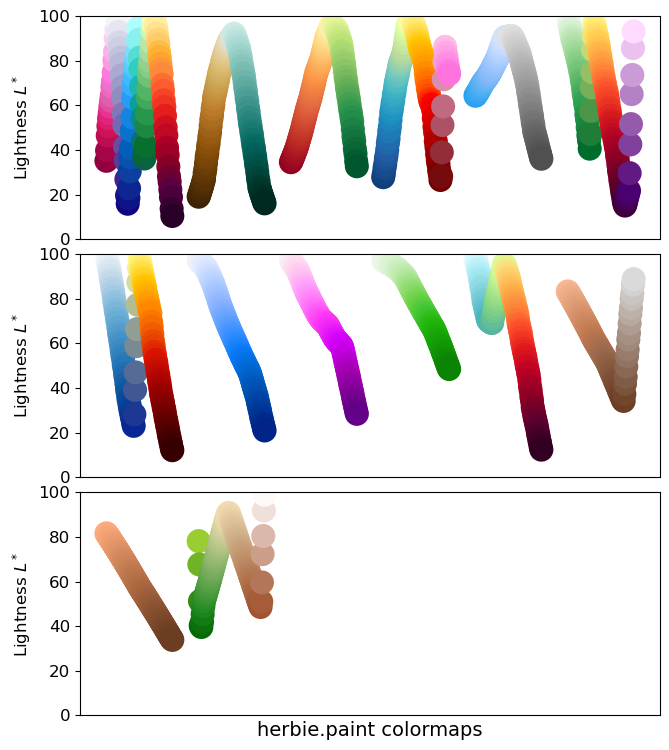

In [3]:
from colorspacious import cspace_converter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

# --------------

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh, left=0.2, right=0.99)
    axs[0].set_title(f"{category} colormaps", fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect="auto", cmap=mpl.colormaps[name])
        ax.text(
            -0.01,
            0.5,
            name,
            va="center",
            ha="right",
            fontsize=10,
            transform=ax.transAxes,
        )

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list


# --------------
import herbie.paint  # noqa: E402

plot_color_gradients(
    "herbie.paint",
    [
        "nws.tmp",
        "nws.dpt",
        "nws.rh",
        "nws.wind",
        "nws.cloud",
        "nws.pcp",
        "nws.snow",
        "nws.snow_pop",
        "nws.ice_pop",
        "nws.rain_pop",
        "nws.wave",
        "land_tan",
        "land_brown",
        "land_green",
    ],
)

# --------------

mpl.rcParams.update({"font.size": 12})

# Number of colormap per subplot for particular cmap categories
_DSUBS = {
    "Perceptually Uniform Sequential": 5,
    "Sequential": 6,
    "Sequential (2)": 6,
    "Diverging": 6,
    "Cyclic": 3,
    "Qualitative": 4,
    "Miscellaneous": 6,
}

# Spacing between the colormaps of a subplot
_DC = {
    "Perceptually Uniform Sequential": 1.4,
    "Sequential": 0.7,
    "Sequential (2)": 1.4,
    "Diverging": 1.4,
    "Cyclic": 1.4,
    "Qualitative": 1.4,
    "Miscellaneous": 1.4,
}

# Indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
print(cmaps.items())
for cmap_category, cmap_list in cmaps.items():
    print(cmap_category)
    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axs = plt.subplots(
        nrows=nsubplots, squeeze=False, figsize=(7, 2.6 * nsubplots)
    )

    for i, ax in enumerate(axs.flat):
        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i * dsub : (i + 1) * dsub]):
            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = mpl.colormaps[cmap](x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # https://stackoverflow.com/q/8202605/

            if cmap_category == "Sequential":
                # These colormaps all start at high lightness, but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j * dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ("Perceptually Uniform Sequential", "Sequential"):
                locs.append(x[-1] + j * dc)
            elif cmap_category in (
                "Diverging",
                "Qualitative",
                "Cyclic",
                "Miscellaneous",
                "Sequential (2)",
            ):
                locs.append(x[int(x.size / 2.0)] + j * dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axs[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position("top")
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i * dsub : (i + 1) * dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)
        ax.set_ylabel("Lightness $L^*$", fontsize=12)

    ax.set_xlabel(cmap_category + " colormaps", fontsize=14)

    fig.tight_layout(h_pad=0.0, pad=1.5)